<a href="https://colab.research.google.com/github/Omonov01/Pneumania_classification/blob/main/Pneumania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install fastai==2.5.3

In [4]:
import torch
import fastai
print(fastai.__version__)
print(torch.__version__)

2.5.3
1.10.2+cu102


In [5]:
from fastai.vision.all import *
from PIL import Image
import glob

path = Path('/content/drive/MyDrive/pnevmoniya/train')


#DataBlock yaratamiz
food = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

#DataLoader yaratamiz
dls = food.dataloaders(path)

#datasetni tekshirish
learn = cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.481931,0.167270,0.942474,01:53


epoch,train_loss,valid_loss,accuracy,time
0,0.153029,0.117875,0.966443,01:40
1,0.091284,0.062767,0.980825,01:40
2,0.049927,0.061385,0.982742,01:40
3,0.029262,0.055002,0.982742,01:42


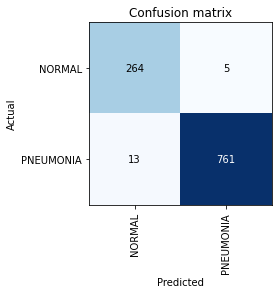

In [6]:
variable = ClassificationInterpretation.from_learner(learn)
variable.plot_confusion_matrix()

In [22]:
import glob
import pandas as pd
type=[]
folder_dir = '/content/drive/MyDrive/pnevmoniya/test'
for images in glob.iglob(f'{folder_dir}/*'):
    if (images.endswith(".jpeg")):
        _,pred_id,_ = learn.predict(images)
        type.append(pred_id)
print(type)

[TensorBase(0), TensorBase(1), TensorBase(0), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(0), TensorBase(0), TensorBase(0), TensorBase(1), TensorBase(1), TensorBase(0), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(0), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(0), TensorBase(1), TensorBase(0), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(0), TensorBase(0), TensorBase(1), TensorBase(0), TensorBase(0), TensorBase(1), TensorBase(0), TensorBase(1), TensorBase(0), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(0), TensorBase(0), TensorBase(0), TensorBase(1), TensorBase(1), TensorBase(0), TensorBase(1), TensorBase(0), TensorBase(1), TensorBase(1), TensorBase(1), TensorBase(0), TensorBas

In [28]:
df = pd.DataFrame(type,columns=['class'])
df

,class
0,0
1,1
2,0
3,1
4,1
...,...
619,1
620,0
621,0
622,1


In [25]:
df1 = pd.read_csv('/content/drive/MyDrive/pnevmoniya/sample_solution.csv')
df1

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,0
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,0
622,test_img_10623.jpeg,0


In [29]:
df1['labels'] = df['class']
df1

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,1
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,1
...,...,...
619,test_img_10620.jpeg,1
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,0
622,test_img_10623.jpeg,1


In [31]:
df1.to_csv("submission.csv", index=False)

In [32]:
learn.export('pneumania_classifikation.pkl')

In [ ]:
model = load_learner("/content/sample_data/pneumania_classifikation.pkl")